# Import Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Load Dataset

In [72]:

file_path = "dataset.csv" 

data = pd.read_csv(file_path)

pd.set_option("display.max_columns", None)  
pd.set_option("display.width", 1000)  
pd.set_option("display.colheader_justify", "left")

print(data.head())


  Country  Year Month     Day of Week Time of Day Urban/Rural Road Type  Weather Conditions  Visibility Level  Number of Vehicles Involved  Speed Limit Driver Age Group Driver Gender  Driver Alcohol Level  Driver Fatigue Vehicle Condition  Pedestrians Involved  Cyclists Involved Accident Severity  Number of Injuries  Number of Fatalities  Emergency Response Time  Traffic Volume Road Condition Accident Cause       Insurance Claims  Medical Cost  Economic Loss Region          Population Density
0     USA  2002   October   Tuesday      Evening   Rural          Street  Windy             220.4147           1                            37           18-25              Male       0.0519                 0                   Poor          1                     2                  Moderate           8                  2                    58.6257                  7412.7528                 Wet              Weather  4                40499.8570    22072.8785             Europe 3866.2730          
1   

# Clean Data

In [73]:
#  CHECK FOR MISSING VALUES

data.isnull().sum()

Country                        0
Year                           0
Month                          0
Day of Week                    0
Time of Day                    0
Urban/Rural                    0
Road Type                      0
Weather Conditions             0
Visibility Level               0
Number of Vehicles Involved    0
Speed Limit                    0
Driver Age Group               0
Driver Gender                  0
Driver Alcohol Level           0
Driver Fatigue                 0
Vehicle Condition              0
Pedestrians Involved           0
Cyclists Involved              0
Accident Severity              0
Number of Injuries             0
Number of Fatalities           0
Emergency Response Time        0
Traffic Volume                 0
Road Condition                 0
Accident Cause                 0
Insurance Claims               0
Medical Cost                   0
Economic Loss                  0
Region                         0
Population Density             0
dtype: int

In [74]:
data.duplicated().sum()

np.int64(0)

In [75]:
#Clean Data and remove missing values
data = data.dropna()

# One Hot Encoding

In [76]:
#One Hot Encoding


categorical_columns = [
    'Country', 'Month', 'Day of Week', 'Time of Day', 'Urban/Rural', 'Road Type', 'Weather Conditions', 'Driver Age Group', 
    'Driver Gender', 'Vehicle Condition', 'Accident Severity', 'Road Condition', 'Accident Cause', 'Region'
]

# Label Encoding for columns
for col in categorical_columns:
    data[col] = pd.factorize(data[col])[0]  # Converts categories to integers

# Check the result
print(data.head())


   Country  Year  Month  Day of Week  Time of Day  Urban/Rural  Road Type  Weather Conditions  Visibility Level  Number of Vehicles Involved  Speed Limit  Driver Age Group  Driver Gender  Driver Alcohol Level  Driver Fatigue  Vehicle Condition  Pedestrians Involved  Cyclists Involved  Accident Severity  Number of Injuries  Number of Fatalities  Emergency Response Time  Traffic Volume  Road Condition  Accident Cause  Insurance Claims  Medical Cost  Economic Loss  Region  Population Density
0  0        2002  0      0            0            0            0          0                  220.4147           1                            37           0                 0             0.0519                 0               0                  1                     2                  0                   8                  2                    58.6257                  7412.7528        0               0               4                40499.8570    22072.8785      0      3866.2730          
1  1        

# Normalization

In [77]:

numerical_columns = [
    'Year', 'Visibility Level', 'Number of Vehicles Involved', 'Speed Limit', 
    'Driver Alcohol Level', 'Driver Fatigue', 'Pedestrians Involved', 'Cyclists Involved', 
    'Number of Injuries', 'Number of Fatalities', 'Emergency Response Time', 
    'Traffic Volume', 'Insurance Claims', 'Medical Cost', 'Population Density', 'Economic Loss'
]


######### # Standardize each numerical column (mean=0, std=1)

# for col in numerical_columns:
#     mean = data[col].mean()
#     std = data[col].std()
#     data[col] = (data[col] - mean) / std  # Apply Z-score normalization

# # Check the result
# print(data.head())



######### # Min-Max Scaling to range [0, 1]

for col in numerical_columns:
    min_val = data[col].min()
    max_val = data[col].max()
    data[col] = (data[col] - min_val) / (max_val - min_val)  # Apply Min-Max scaling

# Check the result
print(data.head())



   Country  Year   Month  Day of Week  Time of Day  Urban/Rural  Road Type  Weather Conditions  Visibility Level  Number of Vehicles Involved  Speed Limit  Driver Age Group  Driver Gender  Driver Alcohol Level  Driver Fatigue  Vehicle Condition  Pedestrians Involved  Cyclists Involved  Accident Severity  Number of Injuries  Number of Fatalities  Emergency Response Time  Traffic Volume  Road Condition  Accident Cause  Insurance Claims  Medical Cost  Economic Loss  Region  Population Density
0  0       0.0833  0      0            0            0            0          0                  0.3787            0.0000                       0.0787        0                 0             0.2077                0.0000           0                 0.5000                1.0000              0                 0.4211              0.5000                0.9750                   0.7387           0               0              0.4444            0.8081        0.2129          0      0.7728             
1  1      

# Select features which effect Economic Loss

In [90]:
selected_features = [
    'Year', 'Number of Vehicles Involved', 'Speed Limit', 'Driver Alcohol Level', 'Driver Fatigue',
    'Pedestrians Involved', 'Cyclists Involved', 'Accident Severity', 'Number of Injuries',
    'Number of Fatalities', 'Emergency Response Time', 'Traffic Volume', 'Road Condition',
    'Insurance Claims', 'Medical Cost', 'Population Density', 'Economic Loss'
]

new_data = data[selected_features].copy()

# new_data.head()


###############################################################


new_data = new_data.head(100)

new_data.head()


,Year,Number of Vehicles Involved,Speed Limit,Driver Alcohol Level,Driver Fatigue,Pedestrians Involved,Cyclists Involved,Accident Severity,Number of Injuries,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Insurance Claims,Medical Cost,Population Density,Economic Loss
0,0.0833,0.0000,0.0787,0.2077,0.0000,0.5000,1.0000,0,0.4211,0.5000,0.9750,0.7387,0,0.4444,0.8081,0.7728,0.2129
1,0.5833,0.6667,0.7416,0.9396,1.0000,0.5000,0.5000,1,0.3158,0.2500,0.9644,0.4403,1,0.3333,0.1209,0.4657,0.0862
2,0.5000,1.0000,0.3596,0.5695,0.0000,0.0000,0.0000,0,0.6842,1.0000,0.6795,0.9855,0,0.4444,0.5791,0.8815,0.5759
3,0.7083,0.3333,0.5393,0.4833,1.0000,1.0000,0.0000,1,0.3158,0.7500,0.7919,0.4908,2,0.3333,0.5111,0.5613,0.2011
4,0.0833,0.0000,0.7640,0.6234,1.0000,0.0000,0.5000,0,0.6842,1.0000,0.2421,0.3781,2,0.8889,0.3052,0.7763,0.1271


# Display Data

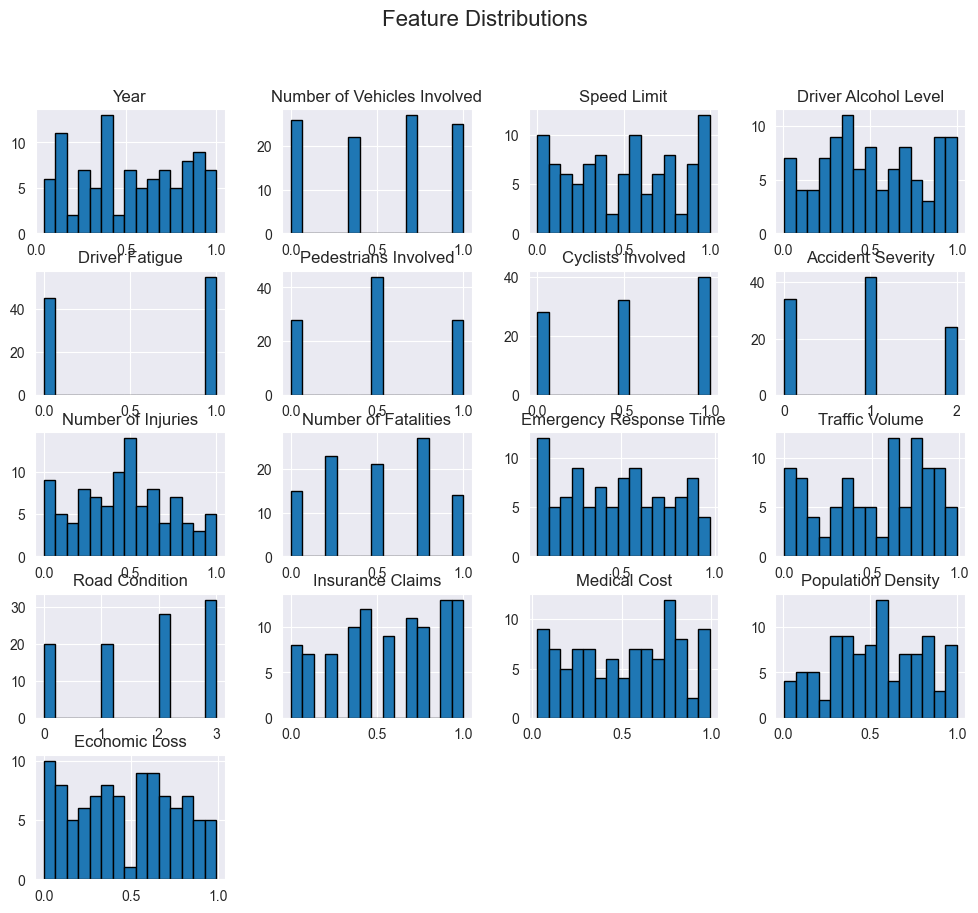

In [91]:
# Plot histograms for each selected feature
new_data.hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

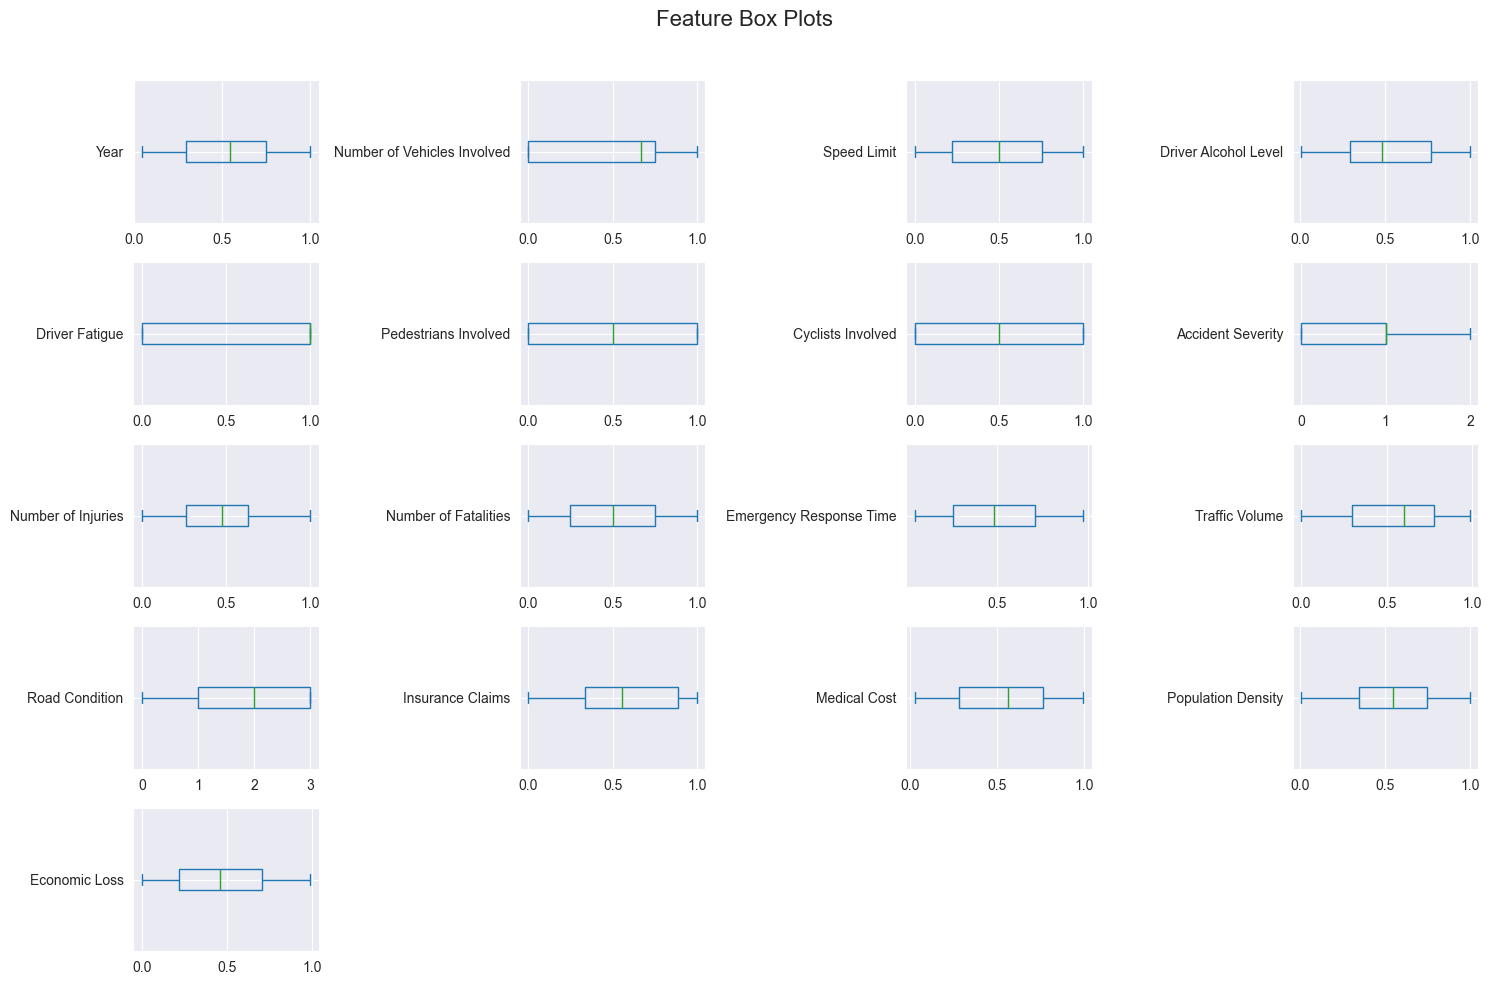

In [92]:
# Box Plot Display
num_features = new_data.shape[1]  
rows = (num_features // 4) + 1  
cols = 4  
new_data.plot(kind='box', figsize=(15, 10), vert=False, subplots=True, layout=(rows, cols), sharex=False, sharey=False)
plt.suptitle("Feature Box Plots", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


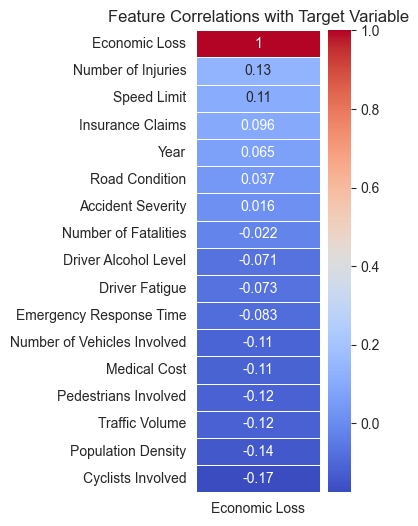

In [93]:

# Compute correlation matrix
correlation_matrix = new_data.corr()

# Get correlation with target variable (assuming 'Accident Severity' is the target)
correlations = correlation_matrix['Economic Loss'].sort_values(ascending=False)

# Plot heatmap for correlations with target variable
plt.figure(figsize=(2, 6))
sns.heatmap(correlations.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlations with Target Variable")
plt.show()


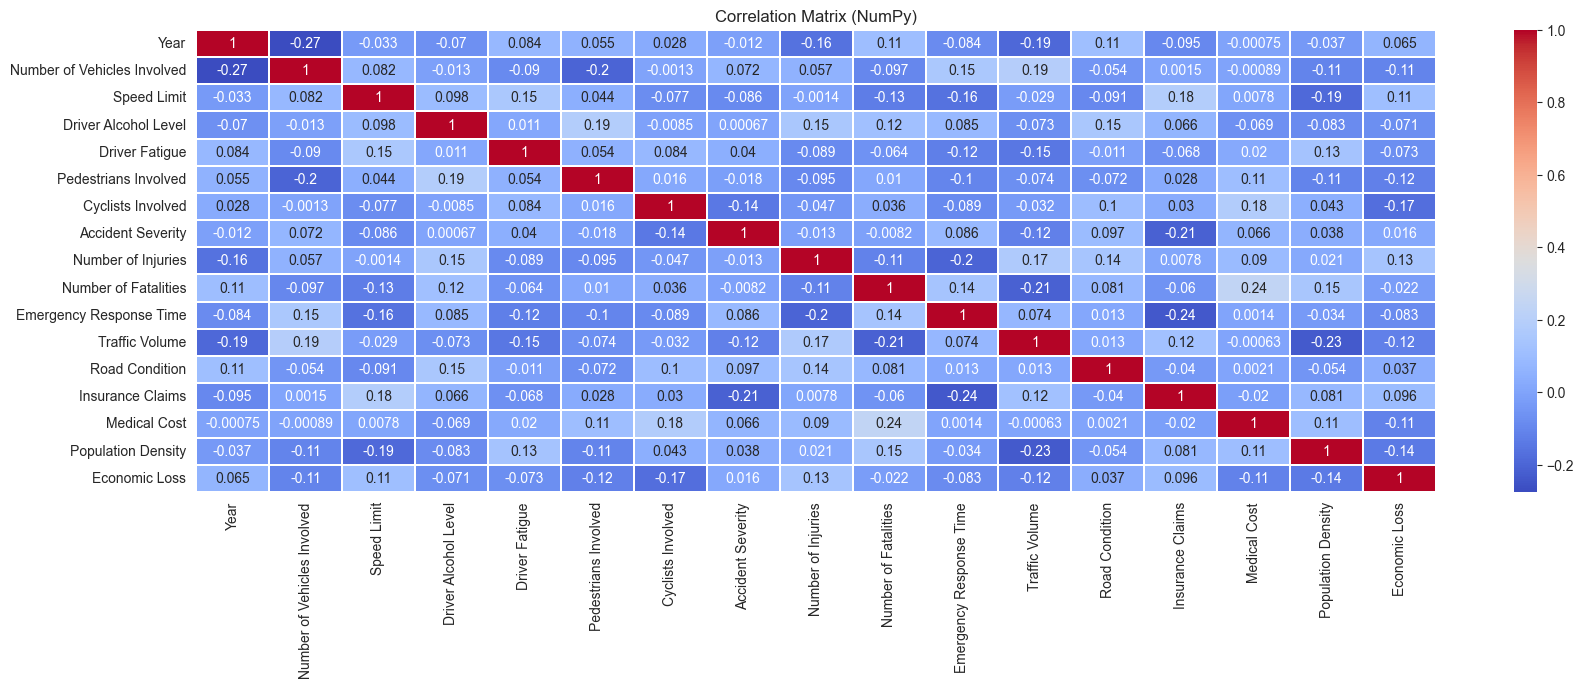

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.1)
plt.title("Correlation Matrix (NumPy)")
plt.show()


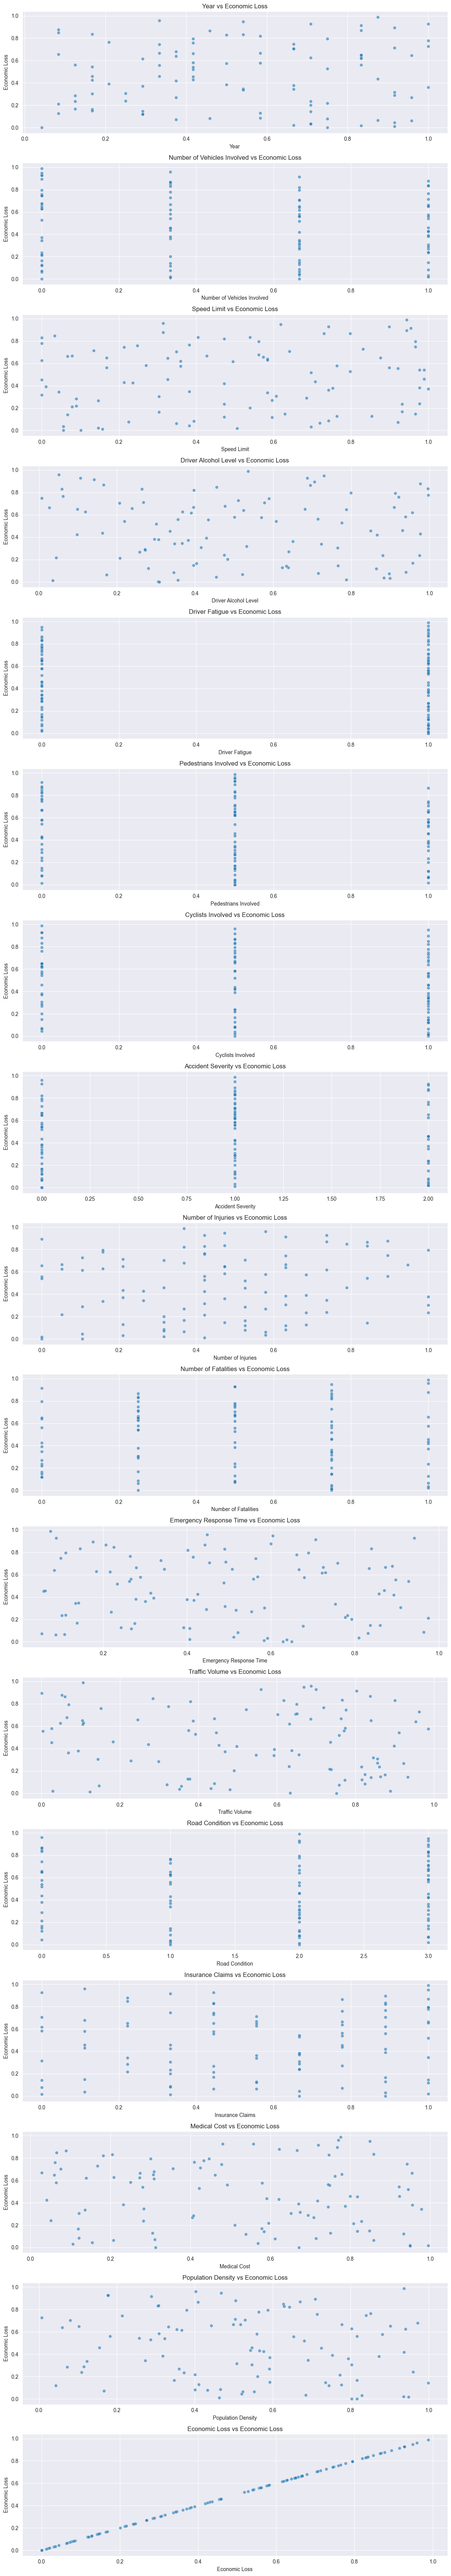

In [95]:

# List of selected features to plot against the target variable ('Economic Loss')
target_variable = 'Economic Loss'

# Create scatter plots
plt.figure(figsize=(12, 4 * len(selected_features)))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(len(selected_features), 1, i)
    sns.scatterplot(x=new_data[feature], y=new_data[target_variable], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.title(f"{feature} vs {target_variable}")

plt.tight_layout()
plt.show()


# Define X and y and set Hyper parameters

In [102]:
# Define features (X) and target variable (y)
X = new_data.drop(columns=['Economic Loss']).values  # Convert to NumPy array
y = new_data['Economic Loss'].values.reshape(-1, 1)  # Convert to NumPy array and reshape

# Add bias term (intercept) to X
X = np.c_[np.ones((X.shape[0], 1)), X]  # Adding a column of ones for the intercept

# Hyperparameters
learning_rate = 0.01  # Step size
epochs = 1000  # Number of iterations
m = X.shape[0]  # Number of samples

# Initialize weights (theta) randomly
theta = np.random.randn(X.shape[1], 1)

In [103]:
# THE VALUES OF X WITH ONE COL AS BIASS

columns = ['Bias'] + list(new_data.drop(columns=['Economic Loss']).columns)  # Add column names
X_df = pd.DataFrame(X, columns=columns)
pd.set_option("display.float_format", "{:.4f}".format)  # Limit decimal places
print(X_df.head(10))  # Show first 10 rows neatly


   Bias   Year   Number of Vehicles Involved  Speed Limit  Driver Alcohol Level  Driver Fatigue  Pedestrians Involved  Cyclists Involved  Accident Severity  Number of Injuries  Number of Fatalities  Emergency Response Time  Traffic Volume  Road Condition  Insurance Claims  Medical Cost  Population Density
0 1.0000 0.0833 0.0000                       0.0787       0.2077                0.0000          0.5000                1.0000             0.0000             0.4211              0.5000                0.9750                   0.7387          0.0000          0.4444            0.8081        0.7728             
1 1.0000 0.5833 0.6667                       0.7416       0.9396                1.0000          0.5000                0.5000             1.0000             0.3158              0.2500                0.9644                   0.4403          1.0000          0.3333            0.1209        0.4657             
2 1.0000 0.5000 1.0000                       0.3596       0.5695               

# Training

In [104]:


# Store loss for visualization
loss_history = []

# Gradient Descent Loop
for epoch in range(epochs):
    # Compute predictions
    y_pred = np.dot(X, theta)

    # Compute error
    error = y_pred - y

    # Compute gradients
    gradients = (1/m) * np.dot(X.T, error)

    # Update weights
    theta -= learning_rate * gradients

    # Compute and store loss (Mean Squared Error)
    mse = np.mean(error ** 2)
    loss_history.append(mse)

    # Print MSE every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: MSE = {mse}")



Epoch 0: MSE = 2.078692067856906
Epoch 100: MSE = 0.8261907662194237
Epoch 200: MSE = 0.58808918571358
Epoch 300: MSE = 0.463048585969948
Epoch 400: MSE = 0.38477687898033563
Epoch 500: MSE = 0.32903179658890175
Epoch 600: MSE = 0.28617270015324114
Epoch 700: MSE = 0.25186413959385967
Epoch 800: MSE = 0.22382442304084532
Epoch 900: MSE = 0.20064862775073677


In [105]:
# Final model parameters (theta)
print("Final weights (theta):")
print(theta)

# Making predictions on the same dataset
predictions = np.dot(X, theta)

# Display first 5 predictions
print("First 5 Predictions:")
print(predictions[:5])


Final weights (theta):
[[ 1.07131263]
 [-0.59494727]
 [-0.32058195]
 [ 0.14739421]
 [ 0.36952828]
 [-0.01664029]
 [-0.57075453]
 [-0.12630082]
 [ 0.05776702]
 [-0.55999548]
 [ 0.09540178]
 [-0.22554591]
 [-0.24991467]
 [ 0.02816516]
 [ 0.51445938]
 [ 0.17349296]
 [-0.10063854]]
First 5 Predictions:
[[0.39686219]
 [0.35287225]
 [0.26975899]
 [0.12491874]
 [1.33649517]]


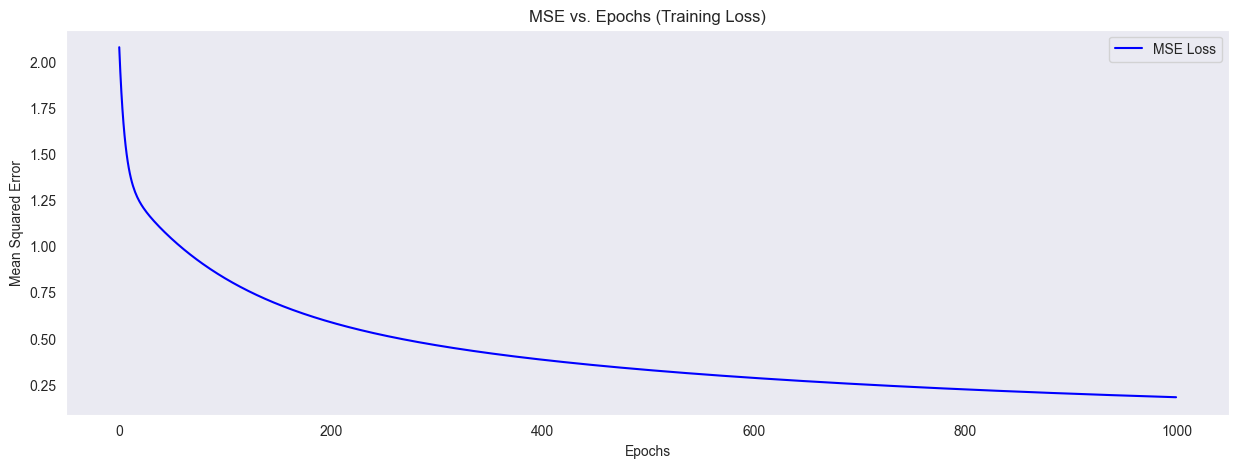

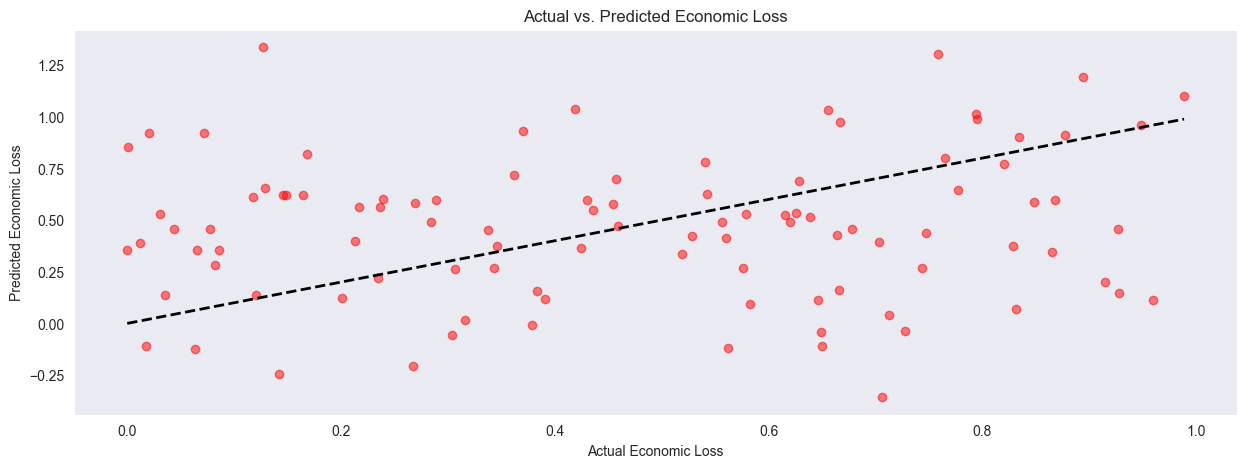

In [106]:

# Plot MSE vs. Epochs
plt.figure(figsize=(15, 5))
plt.plot(range(epochs), loss_history, label="MSE Loss", color='b')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs. Epochs (Training Loss)")
plt.legend()
plt.grid()
plt.show()

# Scatter plot: Actual vs. Predicted Economic Loss
plt.figure(figsize=(15, 5))
plt.scatter(y, predictions, color='r', alpha=0.5)
plt.xlabel("Actual Economic Loss")
plt.ylabel("Predicted Economic Loss")
plt.title("Actual vs. Predicted Economic Loss")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Reference line
plt.grid()
plt.show()


In [107]:
def predict_economic_loss(features):
    """
    Predict Economic Loss using the trained model.
    
    :param features: List or NumPy array of feature values (excluding 'Economic Loss')
    :return: Predicted economic loss value
    """
    if len(features) != X.shape[1] - 1:
        raise ValueError(f"Expected {X.shape[1] - 1} features, but got {len(features)}")

    features = np.array(features).reshape(1, -1)  # Convert input to NumPy array
    features = np.c_[np.ones((features.shape[0], 1)), features]  # Add bias term
    prediction = np.dot(features, theta)  # Compute prediction

    return prediction[0, 0]

# Example usage with a random test sample (replace with actual values)
test_features = [0.098, 0.2, 0.50, 0.1, 0, 0.1, 0, 0.3, 1, 0, 0.5, 0.300, 2, 1, 0.2000, 0.500]  # Example input
predicted_loss = predict_economic_loss(test_features)
print(f"Predicted Economic Loss: {predicted_loss:.2f}")


Predicted Economic Loss: 0.83


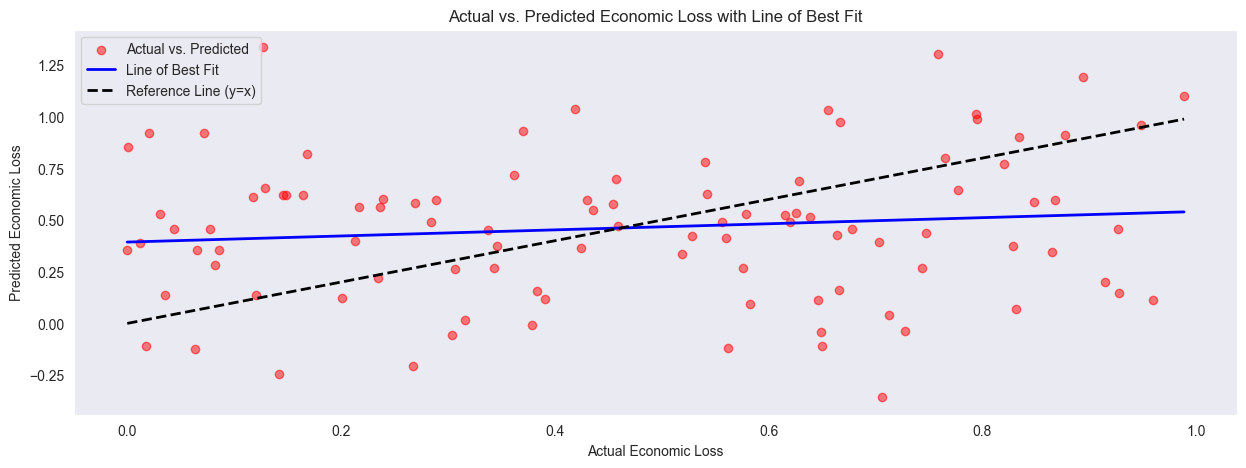

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
y_actual = np.array(y)  # Actual Economic Loss
y_predicted = np.array(predictions)  # Predicted Economic Loss

# Compute Least Squares for Line of Best Fit
N = len(y_actual)
sum_x = np.sum(y_actual)
sum_y = np.sum(y_predicted)
sum_xy = np.sum(y_actual * y_predicted)
sum_x2 = np.sum(y_actual ** 2)

# Compute slope (m) and intercept (b)
m = (N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x ** 2)
b = (sum_y - m * sum_x) / N

# Generate fitted values for the best-fit line
y_fit = np.linspace(y_actual.min(), y_actual.max(), 100)
predicted_fit = m * y_fit + b  # y = mx + b

# Plot Scatter Plot
plt.figure(figsize=(15, 5))
plt.scatter(y_actual, y_predicted, color='r', alpha=0.5, label="Actual vs. Predicted")

# Plot Line of Best Fit
plt.plot(y_fit, predicted_fit, 'b-', lw=2, label="Line of Best Fit")

# Plot Reference Line (y = x)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2, label="Reference Line (y=x)")

# Labels and title
plt.xlabel("Actual Economic Loss")
plt.ylabel("Predicted Economic Loss")
plt.title("Actual vs. Predicted Economic Loss with Line of Best Fit")
plt.legend()
plt.grid()
plt.show()
